In [1]:
# Created on Sept. 19, 2018
'''
'''
import numpy as np
import torch
import h5py
import time
import matplotlib.pyplot as plt
import copy


# PyTorch Function
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
import torch.optim as optim

# Load Data Set #

In [2]:
CIFAR10 = h5py.File('../CIFAR10.hdf5', 'r')
x_train = CIFAR10['X_train'][:]
y_train = np.array(CIFAR10['Y_train'])
x_test = CIFAR10['X_test'][:]
y_test = np.array(CIFAR10['Y_test'])
print([i for i in CIFAR10.keys()])
CIFAR10.close()

['X_test', 'X_train', 'Y_test', 'Y_train']


# Data Augmentation
1. Color Shift, randomly add numbers from -1 to 1 to all three RGB Channel

In [3]:
x_train_aug = copy.deepcopy(x_train)
y_train_aug = copy.deepcopy(y_train)

In [4]:
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, axes=(1,2,0)))
    plt.show()

## Color Shift ##

In [5]:
# Step 1 Color shift
def color_shift(inputs):
    img = copy.deepcopy(inputs)
    # img = copy.deepcopy(inputs)
    C1_shift = np.random.ranf()*np.random.randint(-1,2)
    C2_shift = np.random.ranf()*np.random.randint(-1,2)
    C3_shift = np.random.ranf()*np.random.randint(-1,2)
    img[0] = img[0] + C1_shift
    img[1] = img[1] + C2_shift
    img[2] = img[2] + C3_shift
    return img

# imshow(torchvision.utils.make_grid(torch.tensor((color_shift(x_train[0])))))


## random horizontal flip

In [6]:
def flip_horizontal(inputs):
    img = copy.deepcopy(inputs)
    flip_dir = np.random.randint(0,2) # 1 flip horizontally; 0 dont flip
    if flip_dir==1:
        img[0] = np.flip(img[0] , 1)
        img[1] = np.flip(img[1] , 1)
        img[2] = np.flip(img[2] , 1)
    return img
# imshow(torchvision.utils.make_grid(torch.tensor(flip_horizontal(img))))

## Random Vertical flip

In [7]:
def flip_vertical(inputs):
    img = copy.deepcopy(inputs)
    flip_dir = np.random.randint(0,2) # 1 flip horizontally; 0 dont flip
    if flip_dir==1:
        img[0] = np.flip(img[0] , 0)
        img[1] = np.flip(img[1] , 0)
        img[2] = np.flip(img[2] , 0)
    return img


## Apply Transformation to x_train and add training data to the training set

In [8]:
for i in range(len(x_train_aug)):
    img = x_train_aug[i]
    img = color_shift(img)
    img = flip_horizontal(img)
    img = flip_vertical(img)
    x_train_aug[i] = img
    

In [10]:
x_train = np.array([x_train, x_train_aug]).reshape([2*50000, 3,32,32])
y_train = np.array([y_train, y_train_aug]).reshape(2*50000)
assert all(y_train[:50000] == y_train[50000:])

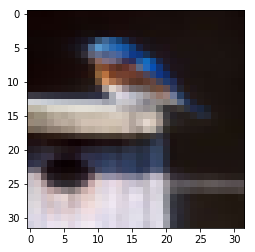

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


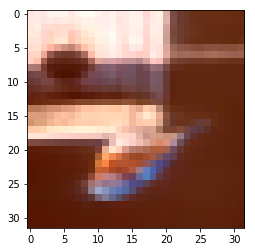

In [18]:
i = 13
imshow(torchvision.utils.make_grid(torch.tensor(x_train[i])))
imshow(torchvision.utils.make_grid(torch.tensor(x_train[50000+i])))

In [19]:
print('Dataset Shape')
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_train.shape)
print('y_test:', y_test.shape)

Dataset Shape
x_train: (100000, 3, 32, 32)
y_train: (100000,)
x_test: (100000, 3, 32, 32)
y_test: (10000,)


# Transform data to mini batchs #


In [20]:
########## Parameters ##########
batch_size = 16

## Load data
x_train = torch.utils.data.DataLoader(x_train, batch_size=16, shuffle=False, num_workers=4)
y_train = torch.utils.data.DataLoader(y_train, batch_size=16, shuffle=False, num_workers=4)
x_test = torch.utils.data.DataLoader(x_test, batch_size=16, shuffle=False, num_workers=4)
y_test = torch.utils.data.DataLoader(y_test, batch_size=16, shuffle=False, num_workers=4)
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# Visualize Our Dataset #

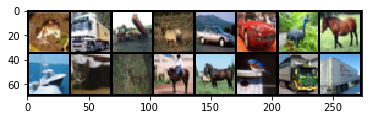

 frog truck truck  deer   car   car  bird horse  ship   cat  deer horse horse  bird truck truck


Process Process-47:
Process Process-43:
Process Process-44:
Process Process-41:
Process Process-48:
Process Process-46:
Process Process-42:
Process Process-45:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/Library/Frameworks/Python.framework/Ve

  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/connection.py", line 414, in _poll
    r = wait([self], timeout)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/selectors.py", line 415, in select
    fd_event_list = self._selector.poll(timeout)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/selectors.py", line 415, in select
    fd_event_list = self._selector.poll(timeout)
KeyboardInterrupt
KeyboardInterrupt
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/connection.py", line 920, in wait
    ready = selector.select(timeout)
KeyboardInterrupt
  File "/Users/zhejianpeng/Environment/deepNet/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 96, in _worker_loop
    r = index_queue.get(timeout=MANAGER_STATUS_CHECK_INTERVAL)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/selectors.py", line 415, in select
    fd_event_list =

In [26]:
import matplotlib.pyplot as plt
import numpy as np

dataiter = iter(x_train)
images = dataiter.next()
dataiter2 = iter(y_train)
labels = dataiter2.next()

imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(16)))


# Build PyTorch Model

In [27]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # 1. 64 channels, k = 4,s = 1, P = 2.
        self.conv1 = nn.Conv2d(3, 64, 4, 1, 2)
        # Batch normalization
        self.conv1_bn = nn.BatchNorm2d(64)
        # 2. 64 channels, k = 4,s = 1, P = 2.
        self.conv2 = nn.Conv2d(64, 64, 4, 1, 2)
        # Max Pooling: s = 2, k = 2.
        self.pool2 = nn.MaxPool2d(2, 2)
        # Dropout 50%
        self.dropout2 = nn.Dropout(0.5)
        # Convolution layer 3: 64 channels, k = 4,s = 1, P = 2.
        self.conv3 = nn.Conv2d(64, 64, 4, 1, 2)
        self.conv3_bn = nn.BatchNorm2d(64)
        # Convolution layer 4: 64 channels, k = 4,s = 1, P = 2.
        self.conv4 = nn.Conv2d(64, 64, 4, 1, 2)
        # Max Pooling: s = 2, k = 2
        self.pool4 = nn.MaxPool2d(2, 2)
        self.dropout4 = nn.Dropout(0.5)
        # Convolution layer 5: 64 channels, k = 4,s = 1, P = 2
        self.conv5 = nn.Conv2d(64, 64, 4, 1, 2)
        self.conv5_bn = nn.BatchNorm2d(64)
        # Convolution layer 6: 64 channels, k = 3,s = 1, P = 0.
        self.conv6 = nn.Conv2d(64, 64, 3, 1, 0)
        self.dropout6 = nn.Dropout(0.5)
        # Convolution layer 7: 64 channels, k = 3,s = 1, P = 0
        self.conv7 = nn.Conv2d(64, 64, 3, 1, 0)
        self.conv7_bn = nn.BatchNorm2d(64)
        # Convolution layer 8: 64 channels, k = 3,s = 1, P = 0.
        self.conv8 = nn.Conv2d(64, 64, 3, 1, 0)
        self.conv8_bn = nn.BatchNorm2d(64)
        self.dropout8 = nn.Dropout(0.5)
        # Fully connected layer 1: 500 units.
        self.fc1 = nn.Linear(64 * 4 * 4, 500)
        # Fully connected layer 2: 500 units.
        self.fc2 = nn.Linear(500, 500)

    def forward(self, x):
        #print("input:", x.shape)
        x = self.conv1_bn(F.relu(self.conv1(x)))
        #print("1", x.shape)
        x = self.pool2(F.relu(self.conv2(x)))
        #print("2", x.shape)
        x = self.dropout2(x)
        x = self.conv3_bn(F.relu(self.conv3(x)))
        #print("3", x.shape)
        x = self.pool4(F.relu(self.conv4(x)))
        #print("4", x.shape)
        x = self.dropout4(x)
        x = self.conv5_bn(F.relu(self.conv5(x)))
        #print("5", x.shape)
        x = F.relu(self.conv6(x))
        #print("6", x.shape)
        x = self.dropout6(x)
        x = self.conv7_bn(F.relu(self.conv7(x)))
        #print("7", x.shape)
        x = self.conv8_bn(F.relu(self.conv8(x)))
        #print("8", x.shape)
        x = self.dropout8(x)
        #print("9", x.shape)
        x = x.view(-1, 64 * 4 * 4)
        #print("10",x.shape)

        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
        
#         x = self.pool(F.relu(self.conv1(x)))
#         x = self.pool(F.relu(self.conv2(x)))
#         x = x.view(-1, 16 * 5 * 5)
#         x = F.relu(self.fc1(x))
#         x = F.relu(self.fc2(x))
#         x = self.fc3(x)
#         return x

net = CNN()

# Define Optimizer and loss function

In [28]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters())

In [ ]:
start = time.time()
for epoch in range(100):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(zip(x_train,y_train), 0):
        # get the inputs
        inputs, labels = data
        labels = labels.long()
        # zero the parameter gradients
        optimizer.zero_grad()
        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        # print statistics
        running_loss += loss.item()
        if i % 1000 == 999:    # print every 1000 mini-batches
            print('epoch: %d, Sample: %5d | loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 1000))
            running_loss = 0.0 
    # Print Acc every 10 epochs
    if epoch % 10 == 9: 
        correct = 0
        total = 0
        with torch.no_grad():
            for data in zip(x_test, y_test):
                images, labels = data
                labels = labels.long()
                outputs = net(images)
                _, predicted = torch.max(outputs.data, 1)
                # print(labels.size(0))
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        print('Accuracy of the network on the 10000 test images: %f %%' % (
            100 * correct / total))
end = time.time()
print('Finished Training, Time Cost:', start-end)

epoch: 1, Sample:  1000 | loss: 0.976
epoch: 1, Sample:  2000 | loss: 0.906
epoch: 1, Sample:  3000 | loss: 0.899


# Test Accuracy on Test Set 

In [11]:
correct = 0
total = 0
with torch.no_grad():
    for data in zip(x_test, y_test):
        images, labels = data
        labels = labels.long()
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        # print(labels.size(0))
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %f %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 89 %
